# EVALUATION DU MODULE 6 : SVM
Mame-Mor Fall CES Data Science 2016

Consignes : Vous rédigerez un compte-rendu détaillé de ce travail pratique (jusqu’à la question 11),
incluant des réponses littérales, numériques et graphiques, ainsi que les implémentations Python réalisées.
Votre compte-rendu prendra la forme d’un unique document linéaire IPython Notebook (.ipynb). Votre
code devra être commenté de sorte à faire clairement apparaître les différentes parties et questions de ce
travail pratique, ainsi que les opérations élémentaires réalisées dans vos implémentations. Le code Python
devra être exécutable par le correcteur et vos résultats reproductibles. Ce compte-rendu est à envoyer
par courriel à maxime.sangnier@telecom-paristech.fr au plus tard le lundi 20 mai 2016 à 23h59. Seuls
les documents effectivement reçus avant ce moment seront corrigés et notés.

## Questions

### Approche intuitive
1.Exécuter le script svm_gui.py. Il permet d’évaluer en temps réel l’impact du choix du noyau et du
paramètre de régularisation C. Effectuer quelques tests (données linéairement séparables ou non,
unimodales ou non, différents noyaux et paramètres) et commenter les observations. En particulier,
pour des données unimodales (séparables puis avec recouvrement des classes), comment réagit
le classifieur (frontière et marge) en fonction du choix de C d’abord (noyau linéaire) puis de γ
(paramètre du noyau gaussien) ? Le choix de ces paramètres est-il crucial pour obtenir de bons taux
de reconnaissance ?

Données linéairement séparables :
Impact du choix de C

On observe que pour des données linéairement séparables le choix de C n'a aucun impact sur le positionnement des vecteurs support, ce qui est normal car C est un paramètre de "régularisation" qui agit comme un compromis biais-variance en pénalisant le choix de vecteurs support minimisant la fonction de coût mais trop "éloigné" des données d'apprentissage. Dans notre cas où les données sont parfaitement séparables nous n'avons pas ce problème.

Impact du choix du noyau gaussien

Le noyau gaussien fait partie d'un ensemble de techniques appellées "kernel trick" qui permet de transformer l'espace de réprésentation des données vers un espace de plus grande dimension où les données seraient linéairement séparables. Dans le cas du noyau gaussien, un espace de dimension infinie. Ici on observe que l'hyperplan séparateur n'est plus linéaire mais courbé autour des données pour les séparer en deux espaces. Les vecteurs supports passent par les données mais leur interprétation est moins évidente.

Impact du choix du noyau polynomial

Le noyau polynomial donne également un hyperplan séparateur et des vecteurs supports courbés qui passent bien par les points des deux classes les plus proches de l'hyperplan séparateur.

Données linéairement non-séparables :
Impact du choix de C

On observe qu'avec des "outliers", des point des deux classes qui se situent au sein de l'autre classe (données non linéairement séparables), plus le terme de régularisation C est grand plus les vecteurs supports "s'éloignent" des données pour aller chercher les outliers. Ce qui correspond bien au comportement attendu.

Impact du choix du noyau gaussien

Ici le choix d'un noyau pour permettre de séparer les données prend tout son sens. Le noyau gaussien permet de s'affranchir de l'hyperplan séparateur linéaire pour obtenir un hyperplan courbé dans l'espace de réprésentation originel des données et sépare parfaitement les deux classes. Le choix du paramètre gamma permet d'ajuster la "distance" de l'hyperplan séparateur aux données. Gamma est un paramètre sur la distance euclidienne des données au séparateur de classe.

Impact du choix du noyau polynomial

Avec le noyau polynomial de degré 3, dans l'exemple que j'ai réalisé, les données sont bien séparées en deux classes et les vecteurs supports passent bien par les points les plus proches de l'hyperplan séparateur. Le noyau polynomial transforme l'espace originel des données en un espace contenant de nouvelles dimensions qui sont les produits croisés des features pour y trouver un hyperplan séparateur linéaire dans ce nouvel espace. Dans l'espace d'origine l'hyperplan séparateur est ainsi non linéaire. Dans notre cas les courbures de l'hyperplan sont difficiles à interpréter. On peut réduire le nombre de degré (donc la flexibilité) de l'hyperplan séparateur de 3 à 2 pour obtenir une frontière plus interprétable. Attention le choix de l'intercept aussi a une influence sur le l'hyperplan séparateur, dans ce cas, plus il sera élevé plus il sera prépondérant dans l'espace de dimension supérieur transformant le séparateur courbé en un quasi plan linéaire dans l'espace originel. 

On conclue donc que l'astuce du noyau est un outil puissant dans le cas de données non linéairement séparables mais personnellement mon opinion est que dans un soucis d'interprétabilité des résultats on sera attentif à son analyse.


2.Estimer un classifieur linéaire sur des données unimodales avec recouvrement des classes puis rajouter
des points un par un. Quelles sont les trois zones d’intérêt et comment réagit le classifieur lors
de l’ajout d’un point dans l’une de ces zones ? Que dire de la variable duale αi associée à chaque
point xi en fonction des zones.

Zone 1 : Nouveau point derrière le vecteur support

Le SVC ou classifieur à plus large marge par sa fonction de perte "charnière" ou hinge n'est pas modifié par tous les points qui seraient correctement classifié de fait (derrière le vecteur support). L'ajout d'un nouveau point "correctement" classifié n'a donc aucun impact sur le positionnement des vecteurs supports, ceci est une différence majeure par rapport à d'autres classifieurs. Aplha, solution du problème dual, est nul pour ces points.

Zone 2 : Nouveau point entre le vecteur support et l'hyperplan séparateur

Dans cette zone, on observe un repositionnement du vecteur support pour s'aligner sur l'hyperplan linéaire séparateur qui passe par les points des deux classes les plus proches. Alpha n'est pas nul pour ces points, ce qui entraîne une modification des vecteurs supports.

Zone 3 : Nouveau point derrière le vecteur support opposé

Lorsqu'un nouveau point est ajouté derrière le vecteur support opposé les données deviennent non linéairement séparables. C'est à ce moment qu'en fonction du paramètre de régularisation C, le SVC va repositionner les vecteurs supports pour réduire le "coût" payé pour la mauvaise classification de ce nouveau point. Plus le paramètre de régularisation C grand plus le SVC va déplacer les vecteurs supports pour diminuer ce coût.

3.Générer un jeu de données très déséquilibré (beaucoup plus de points dans une classe que dans
l’autre). Avec un noyau linéaire, diminuer progressivement la valeur de C. Commenter. Ce phénomène
peut être corrigé en pondérant d’avantage l’attache aux données sur la classe la moins présente
(paramètre class_weight de sklearn.svm.SVC).

Comme précédemment, on observe que plus C est petit (paramètre de régularisation) plus les points appartenants aux données sont sur les vecteurs supports.

### Classification
4.À partir de la documentation : http://scikit-learn.org/stable/modules/svm.html, écrire un
script estimant une SVM sur les classes 1 et 2 du jeu de donnée iris. Vous n’utiliserez que les deux
premières variables et un noyau linéaire. Afficher le score moyen et la frontière de décision (utiliser
les fonctions plot_2d et frontiere du fichier utils.py).

On importe les données de la base de données Iris (dataset contenant 150x4 observations de trois différents types de fleur Iris les Setosa, les Versicolour et les Virginica décrites selon la longueur du sépale, sa largueur, la longueur du pétale et sa largueur).

On importe également le classifieur et on oublie pas de normaliser les variables pour mieux prendre en compte toutes les variables.

Ici on sépare l'ensemble des données en deux : 80% des données pour l'apprentissage du classifieur et 20% des données pour le test de validation du modèle.

In [1]:
from sklearn import datasets
from sklearn.svm import LinearSVC
import numpy as np
from math import fmod
import matplotlib.pyplot as plt

iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

from sklearn.cross_validation import train_test_split
X_stdtrain, X_stdtest, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=50)

clf_SVC=LinearSVC()
clf_SVC.fit(X_stdtrain,y_train)
clf_SVCscore=clf_SVC.score(X_stdtest,y_test)
print "le score du classifieur sur les données de test est",clf_SVCscore

/home/reddowan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


le score du classifieur sur les données de test est 0.8


In [2]:
############################################################################
########            Displaying labeled data                         ########
############################################################################
symlist = ['o', 's', 'D', '+', 'x',  '*', 'p', 'v', '-', '^','h','H']
collist = ['blue', 'grey','red', 'purple', 'orange', 'salmon', 'black',
           'fuchsia','chartreuse','burlywood']


def plot_2d(data, y=None, w=None, alpha_choice=1):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    if y is None:
        labs = [""]
        idxbyclass = [range(data.shape[0])]
    else:
        labs = np.unique(y)
        idxbyclass = [np.where(y == labs[i])[0] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(data[idxbyclass[i], 0], data[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(data[:, 1]), np.max(data[:, 1])])
    plt.xlim([np.min(data[:, 0]), np.max(data[:, 0])])
    mx = np.min(data[:, 0])
    maxx = np.max(data[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=alpha_choice)

def plot_2d_simple(data,y=None):
    if y==None:
        plt.scatter(data[:,0],data[:,1],s=50)
    else:
        nY=len(y)
        Ycol=[collist[ y.astype(int)[i] -1 % len(collist)] for i in xrange(nY)]
        plt.scatter(data[:,0],data[:,1],c=Ycol,s=40 )

############################################################################
########            Displaying tools for the Frontiere              ########
############################################################################


from matplotlib import colors
cmap = colors.ListedColormap([ 'SteelBlue','DarkGray', 'LightSalmon', 'LightPink'])
bounds=[0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)


def frontiere(f, data, step=50):
    """ Plot the frontier of a decision function f"""
    xmin, xmax = data[:, 0].min() - 1., data[:, 0].max() + 1.
    ymin, ymax = data[:, 1].min() - 1., data[:, 1].max() + 1.
    xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin) * 1. / step),
                         np.arange(ymin, ymax, (ymax - ymin) * 1. / step))
    z = np.array([f(vec) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    #plt.imshow(z, origin='lower', interpolation="nearest",extent=[xmin, xmax, ymin, ymax], cmap=cm.jet)
    plt.imshow(z, origin='lower', interpolation="nearest",
                extent=[xmin, xmax, ymin, ymax], cmap=cmap)  

    plt.colorbar()



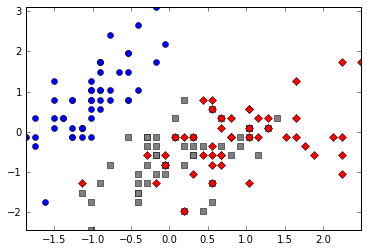

In [3]:
%matplotlib inline

plot_2d(X_std,y)
"""decisionf=clf_SVC.decision_function()
frontiere(decisionf,X_std,step=50)"""
plt.show()

5.En laissant la moitié des données de côté, évaluer la performance en généralisation
du modèle. Pour ce faire, vous déterminerez C par validation croisée en 5 étapes
(scores = cross_val_score(clf, X, y, cv=5)). Comparer le résultat avec une SVM polynomiale.

Pour calculer le meilleur coefficient C de régularisation on utilise la fonction cross_val_score de la librairie cross_validation de sklearn. Celle-ci nous permet d'utiliser l'algorithme k-fold pour calculer le meilleur paramètre sur les données d'apprentissage. Attention, la validation croisée n'est effectuée que sur les données d'apprentissage.

In [4]:
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
scores = {}
for c in [1,5,10,15,100,1000,10000] :
    clf_SVC=LinearSVC(C=c)
    scores[c] = np.mean(cross_val_score(clf_SVC, X_stdtrain, y_train, cv=5, scoring='accuracy'))
print(scores)
print "le score obtenu le plus élevé pour un noyau linéaire est",max(scores.values())

{1: 0.80222965440356742, 100: 0.77614269788182833, 5: 0.80992196209587508, 1000: 0.75646599777034562, 10: 0.80158862876254189, 15: 0.80992196209587508, 10000: 0.69108138238573014}
le score obtenu le plus élevé pour un noyau linéaire est 0.809921962096


On réalise la même opération avec un classifieur SVC utilisant un noyau polynomial. On ne joue ici que sur C et pas sur le degré du noyau polynomial (degré 3 par défaut).

In [5]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
scores = {}
for c in [1,5,10,15,100,1000,10000] :
    clf_SVC=SVC(C=c,kernel='poly')
    scores[c] = np.mean(cross_val_score(clf_SVC, X_stdtrain, y_train, cv=5, scoring='accuracy'))
print(scores)
print "le score obtenu le plus élevé pour un noyau polynomial est",max(scores.values())

{1: 0.6991360089186176, 100: 0.72686733556298766, 5: 0.70947603121516167, 1000: 0.72686733556298766, 10: 0.69208472686733546, 15: 0.69208472686733546, 10000: 0.72686733556298766}
le score obtenu le plus élevé pour un noyau polynomial est 0.726867335563


On s'aperçoit que le score obtenu est plus faible, ce qui signifie que le modèle polynomial se généralise moins bien que le modèle linéaire sur des nouvelles données. On constate à nouveau que plus C est élevé meilleur sont les résultats, ce qui est conforme à nos attentes car le modèle s'attache moins aux données.

6.En vous inspirant de l’exemple http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html (mais sans utiliser MidpointNormalize), afficher une carte de performance
du noyau gaussien appliqué aux données d’apprentissage (on utilisera que 13 valeurs en base 2 pour
C et γ)

13 valeurs à iso distance entre 1 et 10000, toutes les valeurs sont multiples de 2
The best parameters are {'C': 32.0, 'gamma': 0.001953125} with a score of 0.97


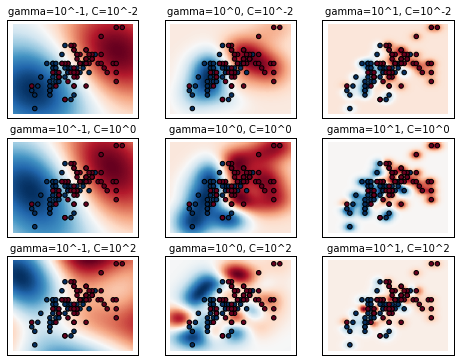

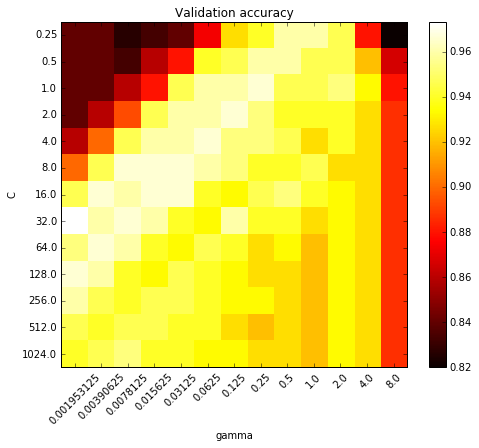

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

##############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

##############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13,base=2)
gamma_range = np.logspace(-9, 3, 13,base=2)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

##############################################################################
# visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
# We extract just the scores
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

Ci-dessus en utilisant le code plot_bf_parameters.py disponible sur le site de scikit-learn on affiche la carte des performances du noyau gaussien pour une plage de 13 valeurs de C et de 13 valeurs de Gamma équidistantes en base 2. On utilise pas la fonction MidpointNormalize dans la visualisation. Comme expliqué sur le site de la fonction lorsque Gamma est faible le modèle ne bénéficie pas assez de la transformation du noyau et son comportement se rapproche du comportement du SVC linéaire ce qui explique que les performances se dégradent. Pour des valeurs intérmédiaires on trouve de bons compromis entre C et gamma où les résultats sont supérieurs à 96% de bonnes prédictions. Les commentaires nous incitent à utiliser pour ces situations la valeur de C la plus petite pour diminuer les ressources mémoire utilisées et accélérer la prédiction.  

7.Dans la suite, on s’intéresse à un problème de classification de visages. À partir du script
svm_lfw.py, montrer l’influence du paramètre de régularisation. On pourra par exemple afficher
l’erreur de prédiction (en test) en fonction de C sur une échelle logarithmique entre 1e-6 et 1e3.

Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.621052631579 for C equals : 1e-06
Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.621052631579 for C equals : 5.6234132519e-06
Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.731578947368 for C equals : 3.16227766017e-05
Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.884210526316 for C equals : 0.000177827941004
Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.921052631579 for C equals : 0.001
Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.926315789474 for C equals : 0.0056234132519
Fitting the classifier to the training set
Predicting the people names on the testing set
Accuracy : 0.926315789474 for C equals : 0.

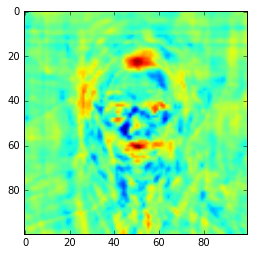

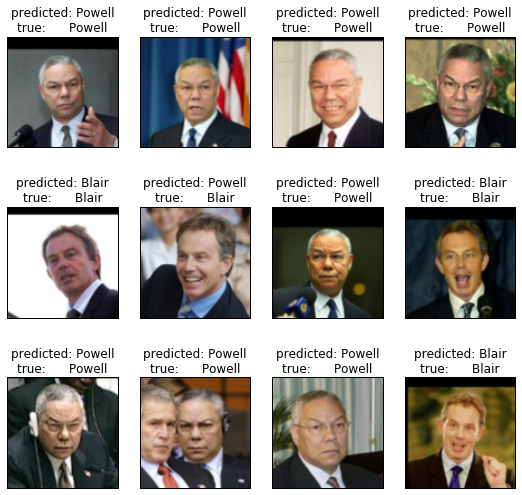

In [21]:
"""
=======================================================
Faces recognition example using SVMs and custom kernels
=======================================================

The dataset used in this example is a preprocessed excerpt 
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

import numpy as np
from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC

####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None, 
                              download_if_missing =True)

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
#names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
#X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
#X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0]/2], indices[X.shape[0]/2:]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx,:,:,:], images[test_idx,:,:,:]

####################################################################
# Quantitative evaluation of the model quality on the test set
C_range=np.logspace(-6,3,13)
for C in C_range:
    print "Fitting the classifier to the training set"
    t0 = time()
    clf = SVC(kernel='linear', C=C)
    clf = clf.fit(X_train, y_train)

    print "Predicting the people names on the testing set"
    t0 = time()
    y_pred = clf.predict(X_test)

    """print "done in %0.3fs" % (time() - t0)
    print "Chance level : %s" % max(np.mean(y), 1. - np.mean(y))"""
    print "Accuracy : %s" % clf.score(X_test, y_test),"for C equals :",C

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))

####################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]
plot_gallery(images_test, prediction_titles)
pl.show()

On observe que plus C est élevé plus les performances de prédiction s'améliorent. Nous avons vu précédemment que C jouait un rôle de paramètre de régularisation et qu'avec un C élevé nous relachions les contraintes du modèle. Ceci pourrait créer une situation d'overfitting sur les données d'apprentissage. On voit ici que ce n'est pas le cas car le modèle se généralise très bien aux nouvelles données de test.

8.Le script que vous utilisez centre et normalise les données. Décrire comment et expliquer l’intérêt
de cette opération.

Le script centre et normalise les données par les lignes de commandes suivantes :

"""Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)"""

La matrice X contient les images dont les pixels ont été mis sur une même ligne.
On retire à tous les pixels la valeur moyenne observée sur l'ensemble d'apprentissage et la déviation standard. On réalise cette opération pour que tous les pixels aient le même range d'évolution et ainsi éviter l'overfitting du classifieur sur une sous partie des pixels qui prendraient des valeurs absolues plus importantes.

9.En conservant les données précédemment créées et pour différentes tailles de l’ensemble d’apprentissage,
évaluer la performance en généralisation d’une SVM linéaire (pour ce faire, choisir C par
validation croisée et enregistrer le score en test). Tracer la courbe d’apprentissage (i.e. le score en
fonction de la taille de l’ensemble d’apprentissage). Cette dernière est une approche empirique de
la consistance de notre estimateur.

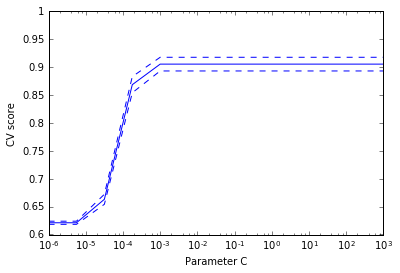

In [39]:
from sklearn import cross_validation

svc=SVC(kernel='linear')
C_range=np.logspace(-6,3,13)
scores = list()
scores_std = list()
for C in C_range:
    svc.C=C
    this_scores=cross_validation.cross_val_score(svc, X_train, y_train)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.clf()
plt.semilogx(C_range, scores)
plt.semilogx(C_range, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_range, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.6, 1)
plt.tight_layout
plt.show()

Par validation croisée on observe qu'à partir de 10-3 pour C on atteint un palier où les performances du classifieur ne s'améliorent plus. On choisira donc C= 10-3.

In [41]:
clf = SVC(kernel='linear', C=0.001)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print "Accuracy : %s" % clf.score(X_test, y_test),"for C equals : 0.001"


Accuracy : 0.921052631579 for C equals : 0.001


On trace la courbe d'apprentissage en utilisant la fonction learning_curve de la libraire sklearn.

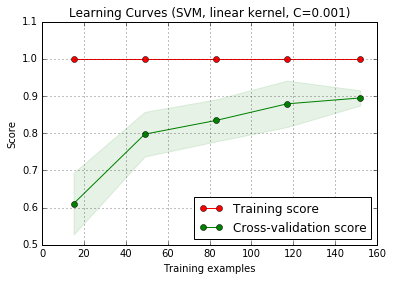

In [48]:
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVM, linear kernel, C=0.001)"

cv = cross_validation.ShuffleSplit(X_train.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(kernel='linear', C=0.001)
estimator = clf.fit(X_train, y_train)

plot_learning_curve(estimator, title, X=X_train, y=y_train, cv=cv)

plt.show()

On constate sur la courbe d'apprentissage que le classifieur continue de progresser au fur et à mesure des nouvelles données, il reste de la marge de progression. On pourrait donc obtenir encore un meilleur résultat en agrandissant le volume des données d'apprentissage.

10.L’exemple http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py explique comment accé-
der au paramètres estimés lors de l’apprentissage : vecteur de coefficients w dans l’attribut
coef_, w0 enregistré dans l’attribut intercept, liste des vecteurs de supports, coefficients du
problème dual). À partir de cet exemple, écrire un script qui calcule la valeur des fonctionnelles
primale et duale. Vérifier que les valeurs sont proches (attention, les étiquettes doivent être −1
ou 1). Comment varie la différence entre les deux valeurs quand on fait varier la tolérance sur
l’optimisation (paramètre tol de SVC) ?

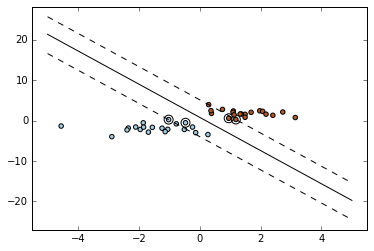

la matrice de poids du probleme primal est [[ 0.75315289  0.18304236]]
la valeur de l'intercept b du probleme primal est [-0.14815982]
la matrice de poids du probleme dual est [ 0.63086395  0.15483955]
la valeur de l'intercept du probleme dual est [-0.27492722]


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear',tol=1)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

"""paramètres de la fonction primale, matrice de poids w et intercept b"""
print "la matrice de poids du probleme primal est", clf.coef_
print "la valeur de l'intercept b du probleme primal est", clf.intercept_

"""paramètres de la fonction duale, matrice de poids w égale au produit des vecteurs supports et des coefficients duaux"""
print "la matrice de poids du probleme dual est",np.dot(clf.dual_coef_,clf.support_vectors_)
"""et intercept b de la fonction duale retrouvé en choisissant une donnée support (étiquette -1) du vecteur support (slide 16 cours SVM)"""
print "la valeur de l'intercept du probleme dual est",(-1-np.dot(clf.coef_,clf.support_vectors_[0,:]))

On observe qu'en augmentant le paramètre tol, les solutions s'éloignent. Mon analyse est que le solveur arrête son calcul itératif pour trouver la meilleur combinaison des paramètres qui permet de trouver le point d'intersection des deux équations.
Je constate que mon intercept s'éloigne mais pas les valeurs de la matrice de poids. C'est certainement l'équation de la matrice de poids duale qui est à corriger. 

### Regression
11.On s’intéresse à présent à prédire l’activité d’une molécule. Pour ce faire, nous considérons une
molécule comme un graphe étiqueté, représenté par un ensemble de relations entre ses nœuds (les
atomes de la molécule). En suivant ces relations au sein d’une molécule x, on parcourt un chemin p
dans le graphe correspondant. Soit alors Pd l’ensemble des chemins possibles (de longueur inférieure
à d) pour la famille de graphes considérée. On note ı(x, p), l’indicateur valant 1 si le chemin p est
présent dans le graphe x, et 0 sinon. 
À partir du fichier drug_activity.py 1, donner le meilleur score possible en prédiction sur le jeu de
données test à l’aide d’une machine à vecteurs supports. Les données de test ne doivent pas intervenir
dans l’apprentissage. Comparer avec la régression régularisée. Changer la mesure d’erreur.

In [86]:
import numpy as np
path = "/home/reddowan/Documents/Telecom Paris/6-Advanced Techniques"

# Load the data
K = np.loadtxt(path + "/ncicancer_kernel_hf_ex0.txt") # Load the kernel
y = np.loadtxt(path + "/ncicancer_targets_ex0.txt")[:, 0] # Load the targets
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # Scale the targets

# Split train/test sets
indices = np.random.permutation(K.shape[0])
train_idx, test_idx = indices[:K.shape[0]/2], indices[K.shape[0]/2:]
K_train = K[train_idx][:, train_idx]
y_train = y[train_idx]
K_test = K[test_idx][:, train_idx]
y_test = y[test_idx]


In [102]:
from sklearn.svm import SVR
C_range=np.logspace(1,3,5)
epsilon_range=np.logspace(-4,0,5)
for C in C_range:
    for epsilon in epsilon_range: 
        clf=SVR(C=C,epsilon=epsilon)
        clf.fit(K_train,y_train)
        print "score avec C",C,"epsilon",epsilon,"le score est de",clf.score(K_test,y_test)


score avec C 10.0 epsilon le score est de 0.0001 0.299591542427
score avec C 10.0 epsilon le score est de 0.001 0.299543122002
score avec C 10.0 epsilon le score est de 0.01 0.296205472188
score avec C 10.0 epsilon le score est de 0.1 0.266375041246
score avec C 10.0 epsilon le score est de 1.0 -3.68088848907
score avec C 31.6227766017 epsilon le score est de 0.0001 0.325964582955
score avec C 31.6227766017 epsilon le score est de 0.001 0.326206248996
score avec C 31.6227766017 epsilon le score est de 0.01 0.326340658087
score avec C 31.6227766017 epsilon le score est de 0.1 0.280838688854
score avec C 31.6227766017 epsilon le score est de 1.0 -3.68088848907
score avec C 100.0 epsilon le score est de 0.0001 0.32626835909
score avec C 100.0 epsilon le score est de 0.001 0.326980569645
score avec C 100.0 epsilon le score est de 0.01 0.330379691011
score avec C 100.0 epsilon le score est de 0.1 0.296814970106
score avec C 100.0 epsilon le score est de 1.0 -3.68088848907
score avec C 316.2

On obtient un score maximum de 34% de bonnes prédictions sur les données de test avec C entre 100 et 1000 et epsilon à 0.01.

In [103]:
from sklearn.kernel_ridge import KernelRidge
clf=KernelRidge()
clf.fit(K_train,y_train)
print "le score est de",clf.score(K_test,y_test)

le score est de 0.340546137852


Avec les paramètres par défaut de la régréssion régularisé (noyau linéaire, alpha le paramètre de régularisation à 1) on obtient 34% de bonnes prédictions sur les données de test.

###Classification de textes###
12.Travailler sur le tutoriel : http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html.

Par manque de temps cette question ne pourra être abordée dans le cadre de ce TP mais j'ai prévu d'évaluer les résultats du SVC sur la classification de texte dans le cadre de mon projet de recherche.